In [3]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import cv2
from numpy import random
import math
from PIL import Image
from math import ceil
from math import sqrt
from math import cos
from math import sin
import scipy.stats as st
from matplotlib.pyplot import figure

### Lab Assignment - 2(b)

#### PROBLEM-1  Take an image and perform contrast stretching in that using the function: Where a and b are minimum and maximum intensity values of the given image, c and d are minimum and maximum intensity values of the targeted image. 

Text(0.5, 1.0, 'Contrast Streching')

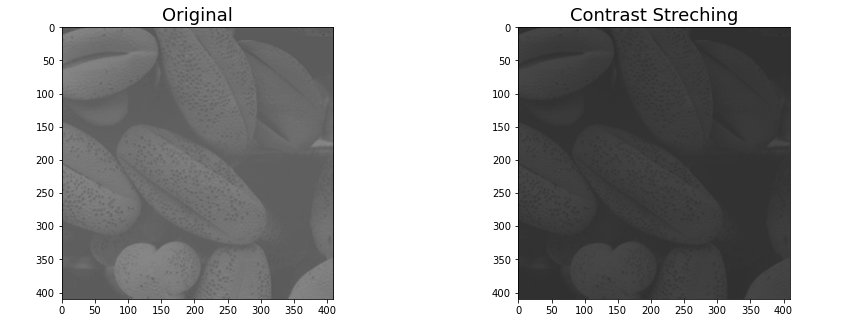

In [4]:
original_grain = cv2.imread('grain.png')

h,w,c=original_grain.shape

pixels = np.array(original_grain)

new_grain = np.zeros((h,w,c), np.uint8)

a = pixels.min()  # minimum intensity values of the given image
b = pixels.max()  # maximum intensity values of the given image
c = 0             # minimum intensity values of the targeted image
d = 255           # maximum intensity values of the targeted image

for i in range (h):
    for j in range (w):
        r=original_grain[i,j]
        new_grain[i,j] = ((r-c)*((b-a)/(d-c)))+a

fig = plt.figure(figsize=(15,5))        

plt.axis("off")
ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(cv2.cvtColor(original_grain, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(122)
plt.imshow(cv2.cvtColor(new_grain, cv2.COLOR_BGR2RGB))
ax.set_title('Contrast Streching',fontsize=18)

#### PROBLEM-2  Create histogram of the image before contrast stretching and after contrast stretching. 

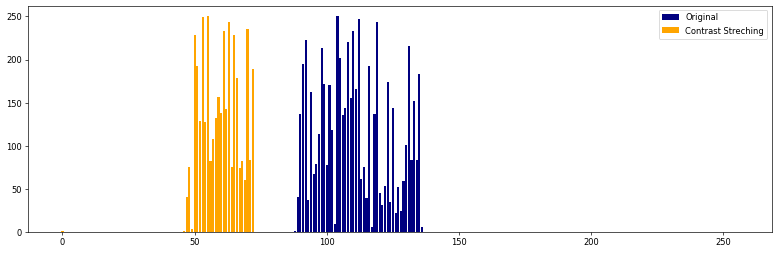

In [5]:
h1=np.zeros((256),np.uint8)
h2=np.zeros((256),np.uint8)

for i in range (h):
    for j in range (w):
        h1[original_grain[i][j]]+=1
        h2[new_grain[i][j]]+=1
        
figure(num=None, figsize=(16, 5), dpi=60)
plt.bar(range(256),h1, label="Original" ,color="navy") #Original image histogram 
plt.bar(range(256),h2, label="Contrast Streching", color="orange") #Processed image histogram  
plt.legend(loc="upper right")
plt.show()

#### PROBLEM-3  Capture an image from webcam / mobile phone in dim light and enhance the image using histogram equalization. 

Text(0.5, 1.0, 'Histogram Equalized')

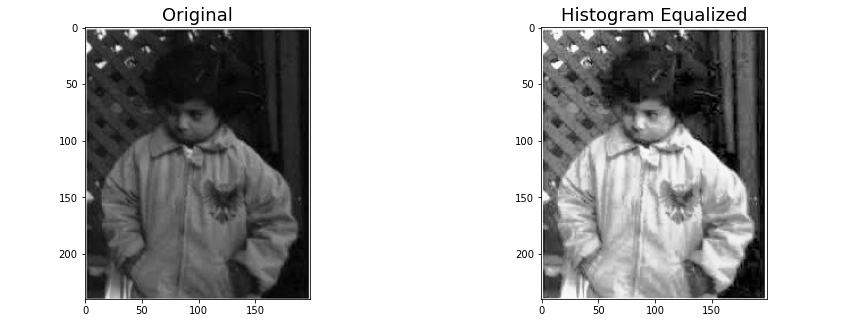

In [6]:
original = cv2.imread("pout.tif")
im = cv2.imread("pout.tif")
rows = im.shape[0]
cols = im.shape[1]

pxint = []
cumf = []
for i in range(0,256):
    pxint.append(0)
    cumf.append(0)
totpx = 0

for i in range(0,rows):
    for j in range(0,cols):
        pxint[im[i][j][0]]+=1
        pxint[im[i][j][1]]+=1
        pxint[im[i][j][2]]+=1
        totpx+=3

#cumulative
cumf[0] = pxint[0]
for i in range(1,256):
    cumf[i] = cumf[i-1]+pxint[i]

#cumulative ratio
for i in range(0,256):
    cumf[i] = math.floor((cumf[i]/totpx)*255)

for i in range(0,rows):
    for j in range(0,cols):
        im[i][j][0] = cumf[im[i][j][0]]
        im[i][j][1] = cumf[im[i][j][1]]
        im[i][j][2] = cumf[im[i][j][2]]

img = Image.fromarray(im)

fig = plt.figure(figsize=(15,5))

plt.axis("off")
ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(original)

ax = fig.add_subplot(122)
plt.imshow(img)
ax.set_title('Histogram Equalized',fontsize=18)


#### PROBLEM-4  Take the same captured image and perform contrast stretching and also compare it with the generated image after scaling the image by a factor of say three. 

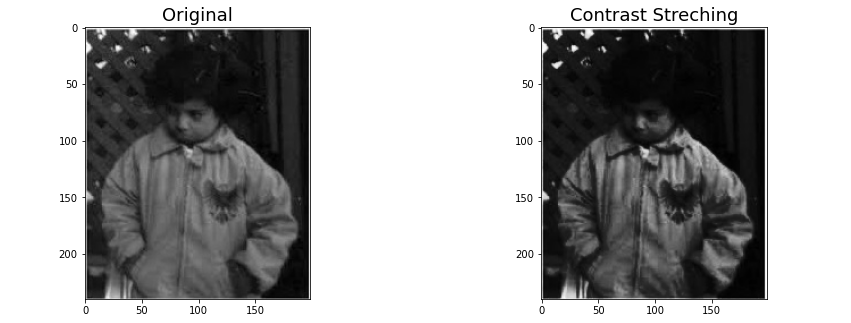

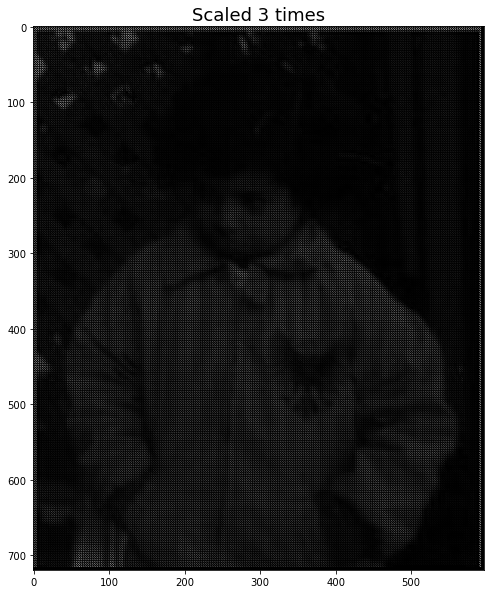

In [7]:
original=cv2.imread("pout.tif",cv2.IMREAD_GRAYSCALE)

height = original.shape[0]
width = original.shape[1]

#contrast streching
new_contrast = np.zeros((height,width,3), np.uint8)

for i in range (height):
    for j in range (width):
        if original[i][j]<=80:
            new_contrast[i][j]=int(original[i][j]/2)
        elif original[i][j]>80 and original[i][j]<=160:
            new_contrast[i][j]=original[i][j]*2-120
        else:
            new_contrast[i][j]=200+int((original[i][j]-160)*(55/95))

#image scaling to 3X
height*=3
width*=3
new_3X = np.zeros((height,width,3), np.uint8)

for i in range (int(height/3)-1):
    for j in range (int(width/3)-1):
        new_3X[3*i,3*j]=original[i,j]
        new_3X[3*i+1,3*j+1]=original[i,j]
        
fig = plt.figure(figsize=(15,5))        

plt.axis("off")
ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

ax = fig.add_subplot(122)
plt.imshow(cv2.cvtColor(new_contrast, cv2.COLOR_BGR2RGB))
ax.set_title('Contrast Streching',fontsize=18)

fig2 = plt.figure(figsize=(25,10)) 
ax2 = fig2.add_subplot(121)
plt.title('Scaled 3 times',fontsize=18)
plt.imshow(new_3X)

#### PROBLEM-5  Take an image let's say "coin.jpg", select ROI of any random size and convert pixels values within it in 8-bit binary format. 

In [8]:
coin = cv2.imread("coin.tif",cv2.IMREAD_GRAYSCALE)
roi = np.zeros((50,50),  dtype = 'int')
for i in range(50):
    for j in range(50):
        roi[i,j] = format(coin[i,j],'08b')
print(roi)

[[11111111 11100010 11100001 ... 11100101 11100101 11100101]
 [11111111 11100010 11100001 ... 11100101 11100101 11100101]
 [11111111 11100010 11100001 ... 11100101 11100101 11100101]
 ...
 [11111111 11100010 11100001 ... 11100001 11100000 11100100]
 [11111111 11100010 11100001 ... 11100011 11100100 11100111]
 [11111111 11100010 11100001 ... 11100011 11100011 11100111]]


#### PROBLEM-6  Display the image for LSB and MSB and plot histogram for these images.

Text(0.5, 1.0, 'Coin - MSB')

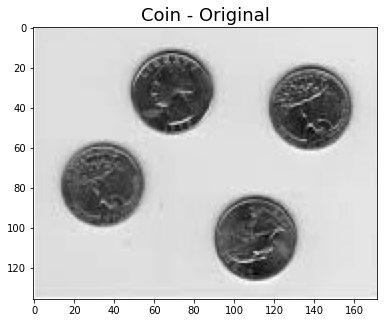

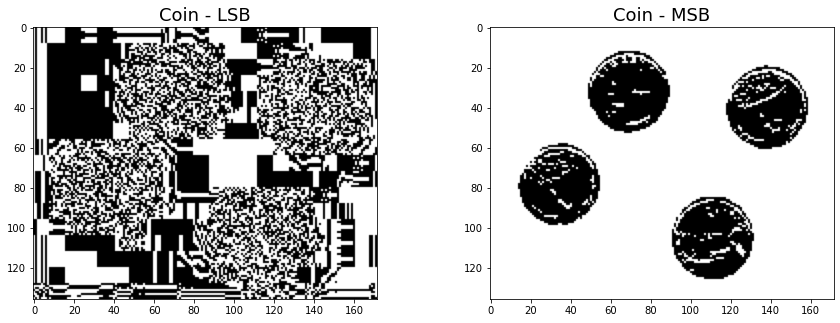

In [9]:
h,w=coin.shape
lsb = np.zeros((h,w), np.uint8)
msb = np.zeros((h,w), np.uint8)

for i in range(h):
    for j in range(w):
        lsb[i,j] = format(coin[i,j],'08b')[-1:]
        msb[i,j] = format(coin[i,j],'08b')[:1]

        
#Output Image  
fig2 = plt.figure(figsize=(15,5))
plt.title('Coin - Original',fontsize=18)
plt.imshow(coin,cmap='gray') 

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.title('Coin - LSB',fontsize=18)
plt.imshow(lsb,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(msb,cmap='gray')
ax.set_title('Coin - MSB',fontsize=18)

#### PROBLEM-7 Split the image in bit planes and then combine bit plane 𝑎𝑏 times. Compare histogram for these images using bin to bin and cross bin comparison method. 

Text(0.5, 1.0, 'Bit plane : b')

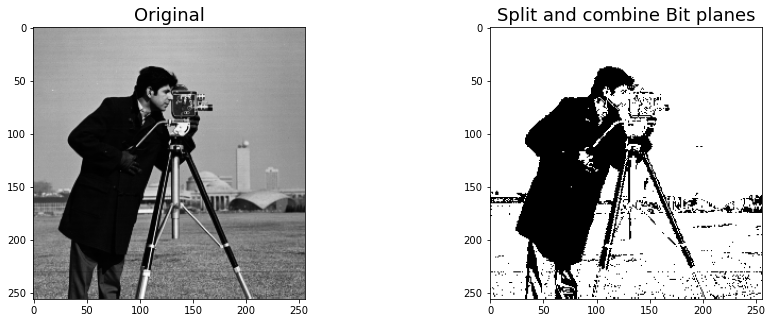

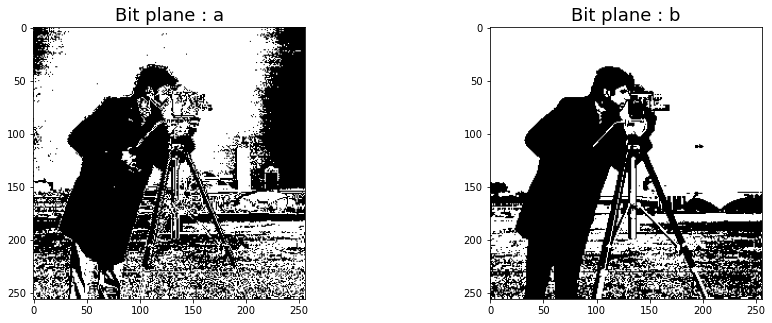

In [10]:
original_img = cv2.imread('cameraman.tif',0)
h,w=original_img.shape
a = np.zeros((h,w), np.uint8)
b = np.zeros((h,w), np.uint8)
ab = np.zeros((h,w), np.uint8)

bit_plane1=5
bit_plane2=7

for i in range (h):
    for j in range (w):
        a[i,j]=(original_img[i,j] & pow(2,bit_plane1))*255/pow(2,bit_plane1)
        b[i,j]=(original_img[i,j] & pow(2,bit_plane2))*255/pow(2,bit_plane2)
            
ab=(a+b)//2
            
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(original_img,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(ab,cmap='gray')
ax.set_title('Split and combine Bit planes',fontsize=18)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.title('Bit plane : a',fontsize=18)
plt.imshow(a,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(b,cmap='gray')
ax.set_title('Bit plane : b',fontsize=18)

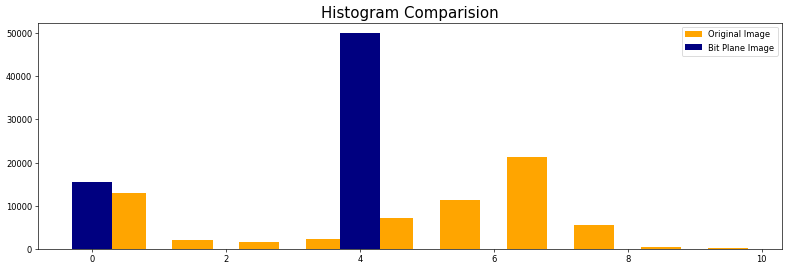

In [11]:
hist1,bins = np.histogram(original_img.ravel(),10,[0,256])
hist2,bins = np.histogram(ab.ravel(),10,[0,256])

figure(num=None, figsize=(16, 5), dpi=60)
x=np.array(range(10))
ax = plt.subplot(111)
ax.set_title('Histogram Comparision',fontsize=18)
ax.bar(0.5+x,hist1,width=0.6, label="Original Image", color="orange", align='center')
ax.bar(x,hist2,width=0.6, label="Bit Plane Image", color="navy", align='center')
plt.legend(loc="upper right")
plt.show()

#### PROBLEM-8  Take a low contrast image of yourself using webcam & perform following point processing operations.

#### (a) Log-transform

Text(0.5, 1.0, 'Log Transform')

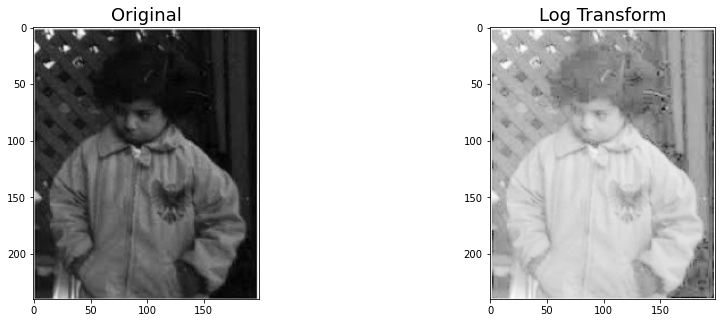

In [146]:
original=cv2.imread("pout.tif",0)
original_log = 0.6 * (np.log(1 + np.float32(original)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(original,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(original_log,cmap='gray')
ax.set_title('Log Transform',fontsize=18)

#### (b) Inverse log transform

c:\users\satya\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Inverse Log Transform')

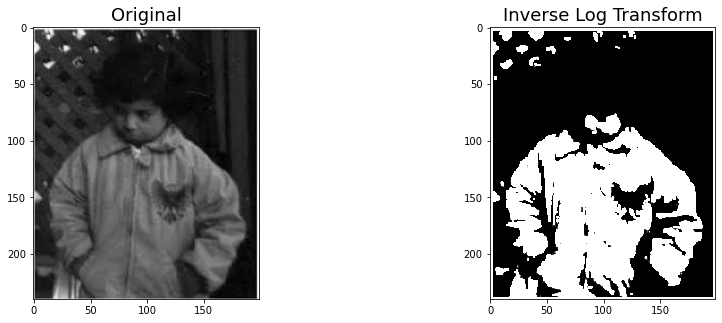

In [147]:
original_log_inv = 0.6 * (np.exp(1 + np.float32(original)))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(original,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(original_log_inv,cmap='gray')
ax.set_title('Inverse Log Transform',fontsize=18)

#### (c) Square

Text(0.5, 1.0, 'Square')

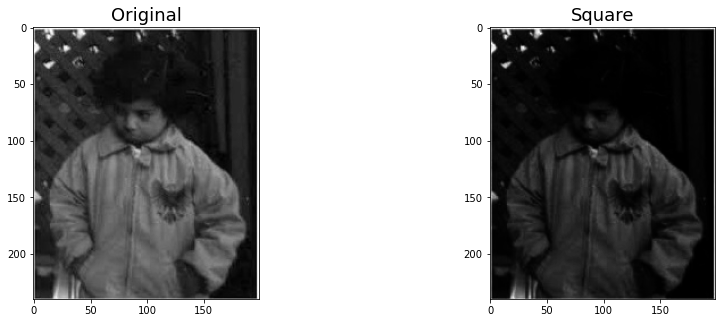

In [148]:
Square = cv2.pow(original/255.0,2) 
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(original,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(Square,cmap='gray')
ax.set_title('Square',fontsize=18)

#### (d) Square root

Text(0.5, 1.0, 'Square Root')

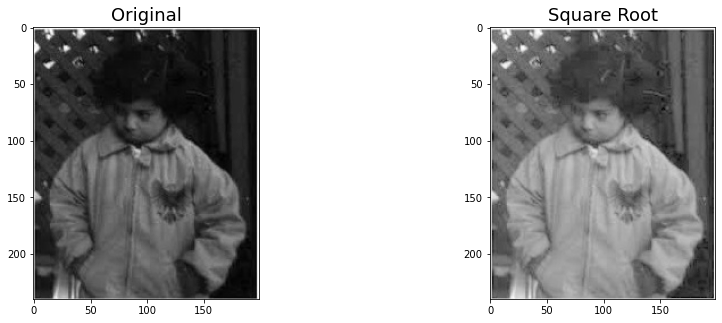

In [150]:
Square_root = cv2.sqrt(original/255.0,2) 
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(original,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(Square_root,cmap='gray')
ax.set_title('Square Root',fontsize=18)

#### (e) Negatives 

Text(0.5, 1.0, 'Negative')

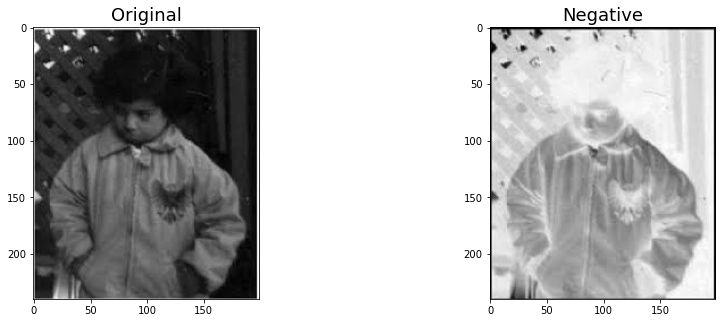

In [151]:
negative = 255 - original
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(original,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(negative,cmap='gray')
ax.set_title('Negative',fontsize=18)

#### PROBLEM-9  Perform a transform on an original picture with c = 1 & gamma = 0.2. Now perform the reverse transformation on the same picture, with c = 1 & gamma = 1/.2. Compare the histogram of both images.

<BarContainer object of 256 artists>

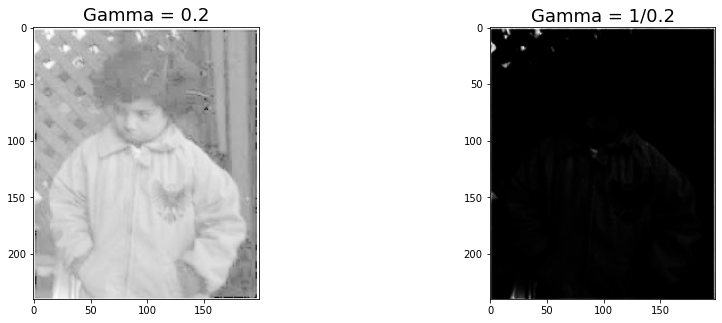

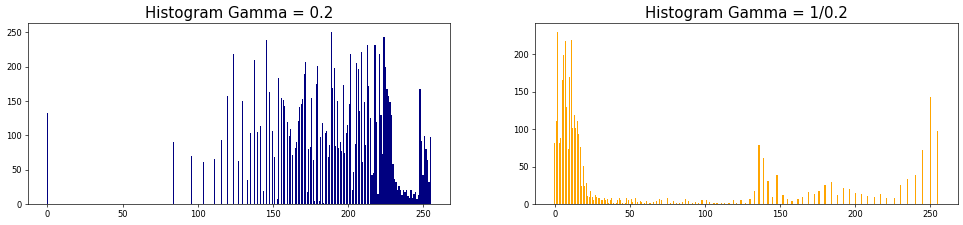

In [153]:
new_img1 = original/255.0
new_img2 = original/255.0
gama1 = 1.0 * cv2.pow(new_img1,0.2) 
gama2 = 1.0 * cv2.pow(new_img1,(1/0.2)) 
  
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Gamma = 0.2',fontsize=18)
plt.imshow(gama1,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(gama2,cmap='gray')
ax.set_title('Gamma = 1/0.2',fontsize=18)

h1=np.zeros((256),np.uint8)
h2=np.zeros((256),np.uint8)

for i in range (original.shape[0]):
    for j in range (original.shape[1]):
        h1[int((gama1[i][j])*255)]+=1
        h2[int((gama2[i][j])*255)]+=1
        
#OUTPUT HISTOGRAM        
fig2 = plt.figure(figsize=(20,4), dpi=60)

ax = fig2.add_subplot(121)
plt.title('Histogram Gamma = 0.2',fontsize=18)
plt.bar(range(256),h1,color="navy") #Original image histogram   

ax = fig2.add_subplot(122)
plt.title('Histogram Gamma = 1/0.2',fontsize=18)
plt.bar(range(256),h2, color="orange") #Processed image histogram 

### 2(c)

#### 1) Split the given Mars_Rover Image in bit planes and then combine the image using any three bit planes. Compare the histograms for the bit planes images using bin to bin and cross bin comparison method.

Text(0.5, 1.0, 'Bit Slicing (3 planes)')

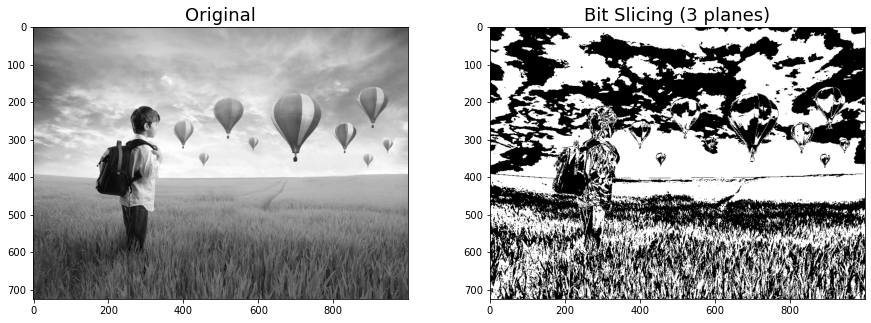

In [261]:
import random
mars=cv2.imread("mars_rover.jpg",cv2.IMREAD_GRAYSCALE)

height = mars.shape[0]
width = mars.shape[1]

mars_bit = np.zeros((height,width,3), np.uint8)
for k in random.sample(range(4, 7), 3):
    for i in range (height):
        for j in range (width):
            mars_bit[i,j]=(mars[i,j]&pow(2,k))*255/pow(2,k)
            
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(mars,cmap='gray')

ax = fig.add_subplot(122)
plt.imshow(mars_bit,cmap='gray')
ax.set_title('Bit Slicing (3 planes)',fontsize=18)

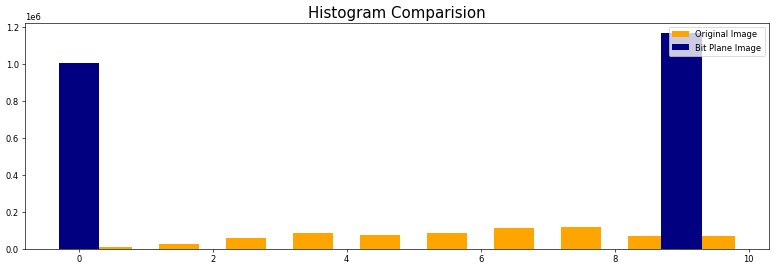

In [262]:
hist1,bins = np.histogram(mars.ravel(),10,[0,256])
hist2,bins = np.histogram(mars_bit.ravel(),10,[0,256])

figure(num=None, figsize=(16, 5), dpi=60)
x=np.array(range(10))
ax = plt.subplot(111)
ax.set_title('Histogram Comparision',fontsize=18)
ax.bar(0.5+x,hist1,width=0.6, label="Original Image", color="orange", align='center')
ax.bar(x,hist2,width=0.6, label="Bit Plane Image", color="navy", align='center')
plt.legend(loc="upper right")
plt.show()

#### 2) In the following images enhance the image from left to the right side image without using auto enhancement methods.

Text(0.5, 1.0, 'Enhanced')

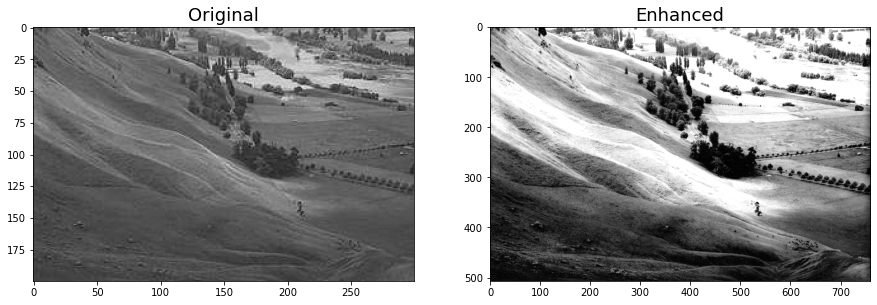

In [155]:
im=cv2.imread("low.jpg",cv2.IMREAD_GRAYSCALE)
img=cv2.imread("low2.jpg",cv2.IMREAD_GRAYSCALE)
cols, rows = img.shape
brightness = np.sum(img) / (255 * cols * rows)

minimum_brightness = 0.55

ratio = brightness / minimum_brightness
if ratio < 1:
    bright_img =  cv2.convertScaleAbs(img, alpha = 1 / ratio, beta = 0)

fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(121)
plt.title('Original',fontsize=18)
plt.imshow(im,cmap='gray')


ax = fig.add_subplot(122)
plt.imshow(bright_img,cmap='gray')
ax.set_title('Enhanced',fontsize=18)